In [33]:
import sys
sys.path.insert(0, "/home/fox/py_projects/HawkesPyLib/LibTest")
from HawkesPyLib.simulation import ApproxPowerlawHawkesProcessSimulation
from HawkesPyLib.inference import ApproxPowlawHawkesProcessEstimation
from HawkesPyLib.inference import qq_plot_unit_exponential
import numpy as np
from scipy import stats

In [16]:
# Initilize the simulator with some example parameters:

mu = 2.5
eta = 0.8
alpha = 0.4
tau0 = 0.1
m = 5.0
M = 5
PowlawSimulator = ApproxPowerlawHawkesProcessSimulation("powlaw-cutoff", mu, eta, alpha, tau0, m, M)

In [24]:
# simulate timestamps
timestamps = PowlawSimulator.simulate(T=100.0)

# if needed change one of the parameter attributes:
mu = 25.0
PowlawSimulator.mu = mu
timestamps = PowlawSimulator.simulate(T=400.0)
print(f"{PowlawSimulator.n_jumps} timestamps were simulated")


48598 timestamps were simulated


In [25]:
# Initilize the Estimator class
PowlawEstimator = ApproxPowlawHawkesProcessEstimation("powlaw-cutoff", m=5.0, M=5)

# Estimate paramters
PowlawEstimator.estimate(timestamps, T=timestamps[-1])
mu_hat, eta_hat, alpha_hat, tau0_hat = PowlawEstimator.mu, PowlawEstimator.eta, PowlawEstimator.alpha, PowlawEstimator.tau0



In [26]:
print(f"Estimated mu: {mu_hat:.2f}, vs. simulated mu: {mu}")
print(f"Estimated mu: {eta_hat:.2f}, vs. simulated mu: {eta}")
print(f"Estimated mu: {alpha_hat:.2f}, vs. simulated mu: {alpha}")
print(f"Estimated mu: {tau0_hat:.2f}, vs. simulated mu: {tau0}")

Estimated mu: 24.78, vs. simulated mu: 25.0
Estimated mu: 0.81, vs. simulated mu: 0.8
Estimated mu: 0.37, vs. simulated mu: 0.4
Estimated mu: 0.09, vs. simulated mu: 0.1


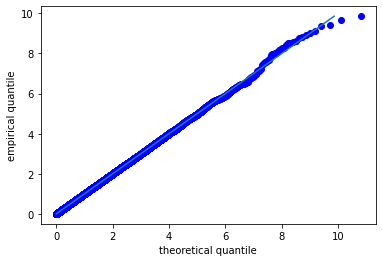

In [32]:
# compute the corresponding compensator:
compensator_timestamps = PowlawEstimator.compensator()

# plot a QQ-plot for the inter-arrival times of the compensator
# The inter-arrival times of the compensator should be unit exponentially distributed if the sample 
durations = np.diff(compensator_timestamps) # inter-arrival times are also called duration times
qq_plot_unit_exponential(durations)

In [34]:
# check if durations are indeed exponentially distributed using scipies KS-test

ks_test = stats.kstest(durations, "expon", alternative="two-sided")

# The null Hypothesis that the durations are from the expoential distribution cannot be rejected
print(ks_test)

KstestResult(statistic=0.0022113185066767183, pvalue=0.9709764824174827)
